In [1]:
# SOURCE: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# This a famous data set analyzed by a famous statistician, Sir Robert Fisher
# Data: 150 measurements of the flowers of three different species of Iris:
# sepal length, sepal width, petal length, petal width.  Thus a 150x4 dimensional
# data set.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df[0:4]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [5]:
sepal_lengths = df.loc[:,'sepal length']
sepal_lengths.shape, sepal_lengths[:5], 

((150,), 0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: sepal length, dtype: float64)

In [6]:
np.mean(sepal_lengths), np.std(sepal_lengths)

(5.843333333333335, 0.8253012917851409)

In [7]:
normalized_sepal_lengths = (sepal_lengths - np.mean(sepal_lengths))/np.std(sepal_lengths)
normalized_sepal_lengths.shape, normalized_sepal_lengths[:5], normalized_sepal_lengths[-5:]

((150,), 0   -0.900681
 1   -1.143017
 2   -1.385353
 3   -1.506521
 4   -1.021849
 Name: sepal length, dtype: float64, 145    1.038005
 146    0.553333
 147    0.795669
 148    0.432165
 149    0.068662
 Name: sepal length, dtype: float64)

In [11]:
# The columns of the data must be scaled to have
# maan 0 and variance 1.


from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x_unscaled = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x_unscaled)

In [12]:
# Let's check the shapes

x.shape, x_unscaled.shape, y.shape

((150, 4), (150, 4), (150, 1))

In [13]:
# Does it check out?

print(x[0:4, 0]), print("----"), print(normalized_sepal_lengths[0:4])

[-0.90068117 -1.14301691 -1.38535265 -1.50652052]
----
0   -0.900681
1   -1.143017
2   -1.385353
3   -1.506521
Name: sepal length, dtype: float64


(None, None, None)

In [15]:
# Let's do PCA, projecting the data onto 
# the first two principal components

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
# Again let's "look into" the data we are making:

principalComponents.shape, principalComponents[0:4]

((150, 2), array([[-2.26454173,  0.5057039 ],
        [-2.0864255 , -0.65540473],
        [-2.36795045, -0.31847731],
        [-2.30419716, -0.57536771]]))

In [17]:
principalDf[0:5]

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [18]:
# We need labeals for the data:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf[0:4]

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa


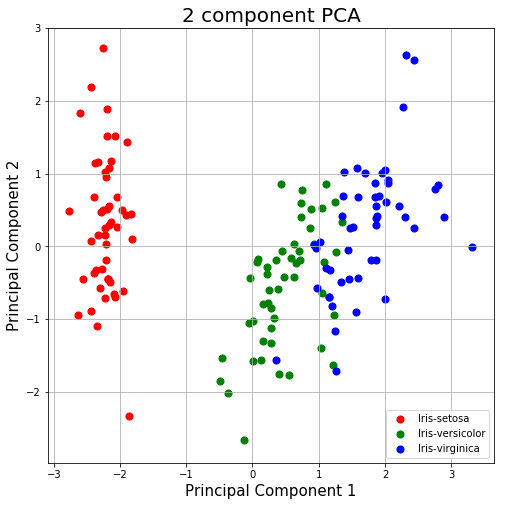

In [19]:
# And now we can visualize the projected data

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [20]:
# Let's see if we can classify the first data element by hand

df[0:1]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa


In [21]:
# But we need its normalized form:

v = x[0]
v

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [22]:
# Now for the fun part: here is the projection matrix:

P = pca.components_
P

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [23]:
# And there is the projection of the firat data row:
# Is it in the right place ont the graph?

np.dot(P,v)

array([-2.26454173,  0.5057039 ])

In [24]:
# Now let's try to classify an unknown flower!
# We will need a function which takes a vector of
# features as input and which yields the normalized
# vector of features as output.

# So we need the means and standard deviations of the columns.
xu = x_unscaled
xu.shape

(150, 4)

In [26]:
means = np.mean(xu, axis=0)
np.mean(xu), means

(3.4636666666666662, array([5.84333333, 3.054     , 3.75866667, 1.19866667]))

In [27]:
stdevs = np.std(xu, axis=0)
stdevs

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [28]:
flower = np.array([5.0, 3.4, 1.3, 0.2])

In [29]:
def normalize(f):
    return (f - means)/stdevs

In [30]:
normalized_flower = normalize(flower)
normalized_flower

array([-1.02184904,  0.80065426, -1.39813811, -1.31297673])

In [34]:
def classify2(f):
    return np.dot(P, normalize(f))

In [35]:
classify2(flower)

array([-2.2999487 ,  0.24521479])

In [36]:
def classify(f):
    return np.dot(P, normalize(f))[0]

In [39]:
classify(flower)

-2.2999486951590327

In [43]:
# Let's grow or shrink the flower and then try to classify it:

flower2 = 0.8*np.array([5.0, 3.4, 1.3, 0.2])
classify(flower2)

-2.6341796402921487

In [ ]:
# Problem 1: devise a way to take a flower meaurement as input and produce
# one of the following strings as output:
# iris-setosa, iris-versicolor, iris-virginica, unclassified
#
# Problem 2: add to the above: a numerical measure of confidence in
# the classification.